# MODULE 3

### TASK 3.1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("Gold.csv")

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [5]:
df.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [6]:
# preparing dfc dataframe for the multiple linear regression
dfc=df.drop(columns=["Date","Vol.","Change %"])

In [7]:
dfcnull=dfc[dfc["Pred"].isnull()]

In [8]:
dfc=dfc.dropna()
dfc

,Price,Open,High,Low,Pred,new
0,28060,28400,28482,28025,738.0,117.570740
1,28184,28136,28382,28135,-146.0,295.430176
2,28119,28145,28255,28097,30.0,132.123714
3,27981,28125,28192,27947,357.0,101.298064
4,28007,28060,28146,27981,124.0,112.153318
...,...,...,...,...,...,...
406,30964,30874,31085,30874,-31.0,301.615081
407,30926,30830,30970,30825,72.0,241.475101
408,31005,31039,31196,30974,35.0,188.222186
409,31440,31011,31480,30941,669.0,976.692705


In [9]:
X = dfc.iloc[:, :4].values
y = dfc.iloc[:, 4].values

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[337. 337.]
 [230. 230.]
 [524. 524.]
 [306. 306.]
 [262. 262.]]


It looks like pred was predictions of multiple linear regression.
Now predicting the pred values which earlier consisted on NAN

In [11]:
Xdf = df.iloc[:, [1,2,3,4]].values

In [12]:
newpred = regressor.predict(Xdf)
df["Pred"]=newpred

In [13]:
X = dfc.iloc[:, :4].values
y = dfc.iloc[:, 5].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[120.24371667 120.39867274]
 [394.10219826 393.45683775]
 [ 86.42440166  86.51325873]
 [ 37.55945833  38.1428805 ]
 [ 85.81780328  86.21872438]]


Column["new"] seems to of polynomial regression

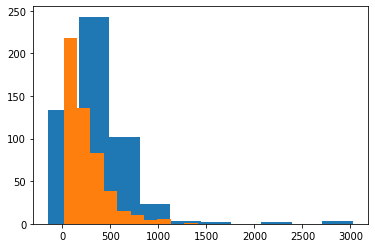

In [14]:
plt.hist(df['Pred'])
plt.hist(df["new"])
plt.show()

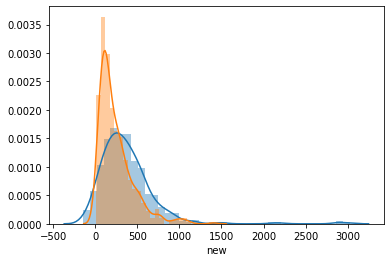

In [15]:
import seaborn as sns
sns.distplot(df['Pred'])
sns.distplot(df['new'])
plt.show()

### TASK 3.2

PERSONAL REFERENCES  
CAPM VIDEO LINK:
https://www.youtube.com/watch?v=-fCYZjNA7Ps  
ERi=Rf + B(ERm -Rf)  
where Rf is risk free rate. B is tells us how is the relation between investment and market.
say if B=1.2%.if market moves up by 1% then our investment will move up by 1.2%  
cash flow today=(cash flow in future)/((1+ERi/100)**2)  
B video link : https://youtu.be/s27-UKEqN4I

In [43]:
nifty=pd.read_csv("Nifty50.csv")
idfc  =pd.read_csv("IDFC.csv")
print(nifty.shape,idfc.shape)

(494, 7) (495, 15)


In [44]:
nifty["Date"]=pd.to_datetime(nifty["Date"])
nifty=nifty.sort_values("Date")
idfc["Date"]=pd.to_datetime(idfc["Date"])
idfc=idfc.sort_values("Date")

In [45]:
dftemp=pd.DataFrame(nifty["Close"].pct_change())
dftemp["Close idfc"]=idfc["Close Price"].pct_change()
dftemp=dftemp.dropna()

In [49]:
dftemp=dftemp[403:493] #dftemp is having 493 rows after cleaning and we want  last 90 days data

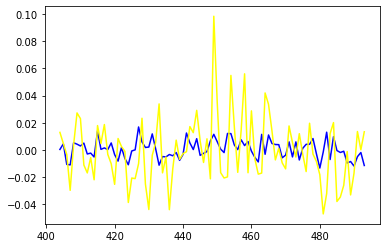

In [50]:
plt.plot(dftemp["Close"],color="blue")
plt.plot(dftemp["Close idfc"],color="yellow")
plt.show()

In [51]:
import statsmodels.api as sm
myModel = sm.OLS(dftemp["Close"],dftemp["Close idfc"]).fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.079
Model:                            OLS   Adj. R-squared (uncentered):              0.069
Method:                 Least Squares   F-statistic:                              7.624
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                     0.00700
Time:                        01:02:48   Log-Likelihood:                          324.72
No. Observations:                  90   AIC:                                     -647.4
Df Residuals:                      89   BIC:                                     -644.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close idfc     0.0807      0.029      2.761      0.007       0.023       0.139
==============================================================================
Omnibus:                        0.562   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.565
Skew:                           0.182   Prob(JB):                        0.754
Kurtosis:                       2.864   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
dftemp=pd.DataFrame(nifty["Close"])
dftemp["Close idfc"]=idfc["Close Price"]
dftemp

,Close,Close idfc
0,9445.40,63.70
1,9512.25,64.25
2,9525.75,63.35
3,9429.45,61.50
4,9427.90,61.15
...,...,...
489,11497.90,37.75
490,11359.45,37.10
491,11301.80,37.60
492,11278.90,37.60


In [35]:
dftemp=dftemp[0:-1:30]
dftemp

,Close,Close idfc
0,9445.40,63.70
30,9511.40,54.95
60,9978.55,56.90
90,10121.90,61.55
120,10451.80,62.30
150,10388.75,57.95
180,11027.70,56.80
210,10195.15,51.25
240,10718.05,58.70
270,10856.70,50.75


In [39]:
dftemp=dftemp.pct_change()
dftemp=dftemp.dropna()
dftemp

,Close,Close idfc
30,0.006988,-0.137363
60,0.049115,0.035487
90,0.014366,0.081722
120,0.032593,0.012185
150,-0.006032,-0.069823
180,0.061504,-0.019845
210,-0.075496,-0.097711
240,0.051289,0.145366
270,0.012936,-0.135434
300,0.025358,-0.103448


In [40]:
import statsmodels.api as sm
myModel = sm.OLS(dftemp["Close"],dftemp["Close idfc"]).fit()
myModel.summary()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.472
Model:                            OLS   Adj. R-squared (uncentered):              0.437
Method:                 Least Squares   F-statistic:                              13.42
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                     0.00230
Time:                        00:59:47   Log-Likelihood:                          30.365
No. Observations:                  16   AIC:                                     -58.73
Df Residuals:                      15   BIC:                                     -57.96
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close idfc     0.3063      0.084      3.664      0.002       0.128       0.484
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.758
Skew:                          -0.518   Prob(JB):                        0.684
Kurtosis:                       2.743   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

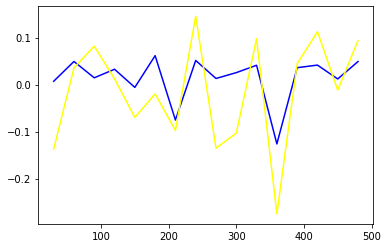

In [41]:
plt.plot(dftemp["Close"],color="blue")
plt.plot(dftemp["Close idfc"],color="yellow")
plt.show()

beta value on daily basis of nifty and idfc was 0.0807It means thar idfc stock prices changes slowly as compard to the changes in nifty stocks and has low volatality  

beta value on monthly basis of nifty and idfc was 0.3063.It means thar idfc stock prices changes slowly as compard to the changes in nifty stocks and has low volatality  

A negative beta correlation means an investment moves in the opposite direction from the stock market. When the market rises, a negative-beta investment generally falls. When the market falls, the negative-beta investment will tend to rise. This is generally true of gold stocks and gold bullion.